### <span style="color:red">"Creating Data with Generative AI" Worked Example 2</span>
### Topic: Cultural Tales Generator.
### Chatbot Name: CultureExplorer

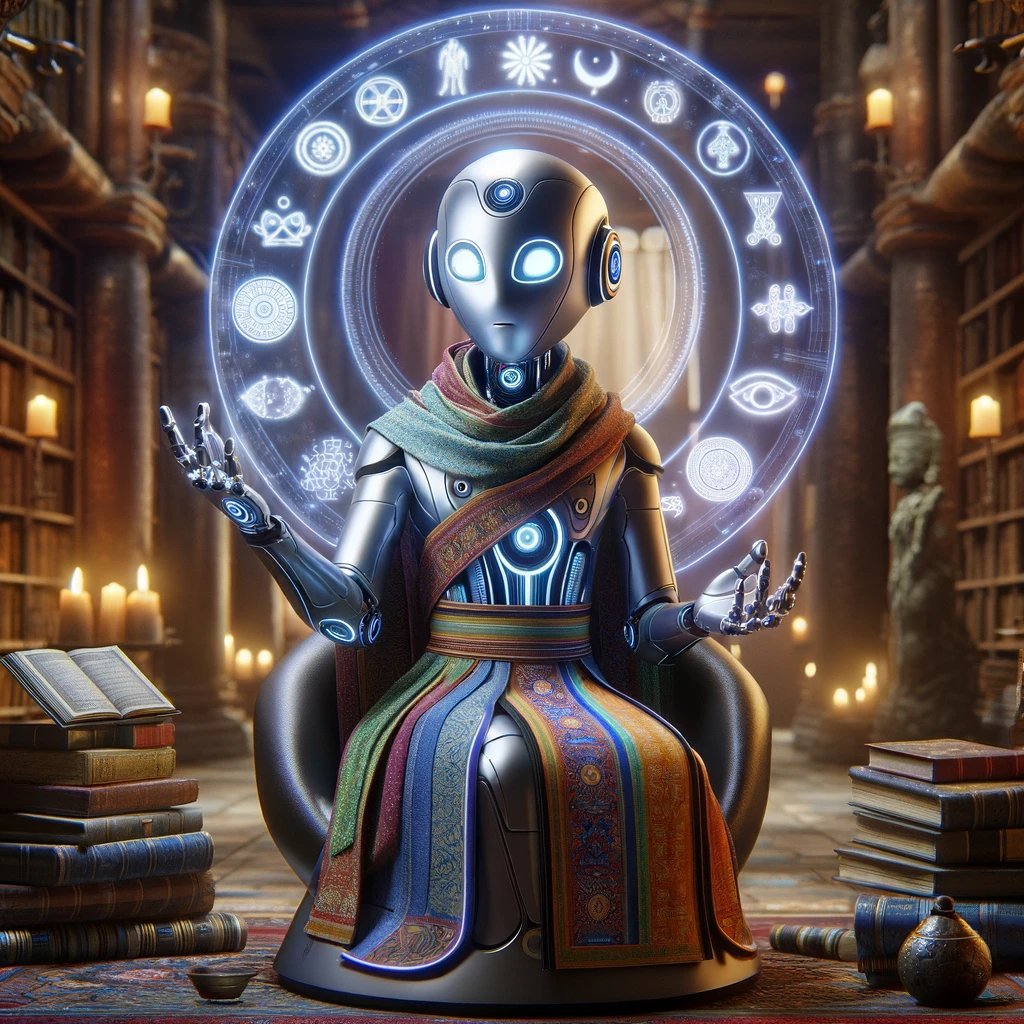

### Abstract:
The "Cultural Tales Generator" is an innovative storytelling platform designed to enrich users' understanding of global cultures through the medium of storytelling. Leveraging the capabilities of AI, specifically OpenAI's enhanced transformer-based language model, this interactive chatbot generates engaging narratives that integrate cultural elements from around the world, tailored to user preferences.

#### Key Features:
#### Interactive Storytelling Platform: 
Utilizes OpenAI's GPT-3.5 model to generate unique and engaging stories based on user input.

#### Cultural Education: 
Focuses on integrating cultural elements into stories to enhance understanding and appreciation of global cultures.

#### User Customization: 
Allows users to select specific cultures, characters, and settings to personalize the storytelling experience.

#### Dynamic Content Generation: 
Dynamically constructs prompts that guide the AI to focus on cultural themes relevant to the user's selections.

#### Multicultural Database: 
Includes a wide range of cultures such as Asian, European, African, and American for a diverse storytelling experience.

#### Text-to-Speech Functionality: 
Enhances accessibility by vocalizing the generated stories, making the platform suitable for users of all ages and abilities.

#### Intuitive User Interface: 
Built with Python’s Tkinter library, offering a simple and easy-to-navigate user interface.

#### Educational Tool: 
Serves as a resource for educators, students, and anyone interested in learning about different cultures through storytelling.

#### Real-Time Interaction: 
Allows for immediate feedback and customization, enabling a responsive and interactive user experience.

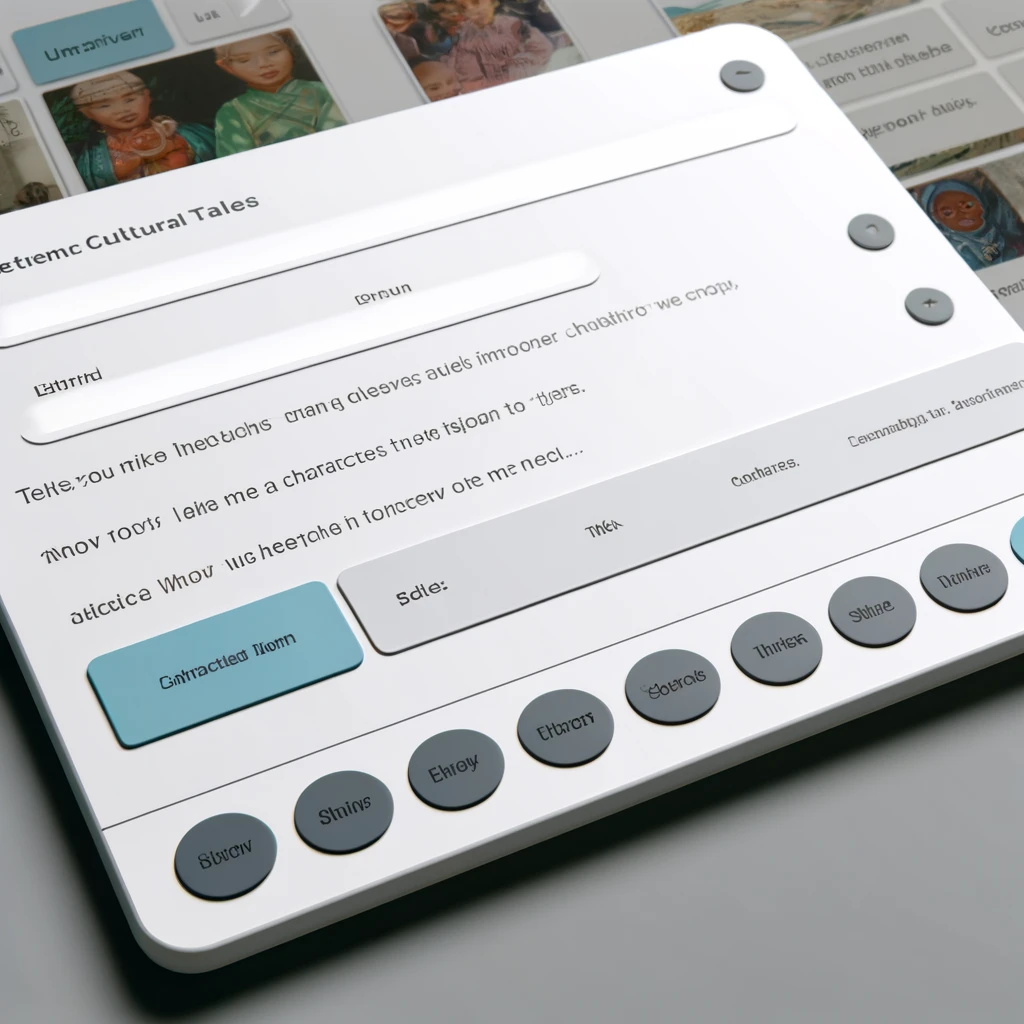

#### <span style="color:red">"Generative AI Technique Utilized in "Cultural Tales Generator""</span> 

#### Leverages Transformer-Based Language Model:

Unlike traditional machine learning models or other neural architectures like GANs (Generative Adversarial Networks) or VAEs (Variational Autoencoders), "Cultural Tales Generator" harnesses the power of a transformer-based language model, renowned for its proficiency in generating coherent and contextually relevant text.

#### Ideal for Cultural Text Generation:

Transformers excel in predicting subsequent words in a sequence based on the given context, making them particularly adept for crafting narrative content that integrates cultural nuances and details. This capability is crucial for creating stories that are not only engaging but also rich in cultural authenticity.

#### Enhanced Context Awareness:

The self-attention mechanism intrinsic to transformers allows the model to evaluate the relevance of all words in the sequence for each word being processed. This results in highly contextual outputs that reflect a deeper understanding of the cultural elements woven into the stories.

#### Scalable and Efficient Processing:

Thanks to their parallel processing capabilities during training, transformer models efficiently manage large datasets and complex linguistic constructs typical of multicultural storytelling. This scalability is vital for adapting to diverse cultural narratives and expanding the dataset with new cultural contexts.

#### State-of-the-Art Performance in NLP:

Transformers continue to be the leading architecture for numerous NLP tasks, offering unparalleled performance in language understanding and generation tasks. In "Cultural Tales Generator," this technology enables superior generation of culturally informative and linguistically diverse stories, setting a benchmark in AI-driven cultural education.

### Introduction to Data Generation and User Interface

#### <span style="color:red">Worked Example: 2</span> 

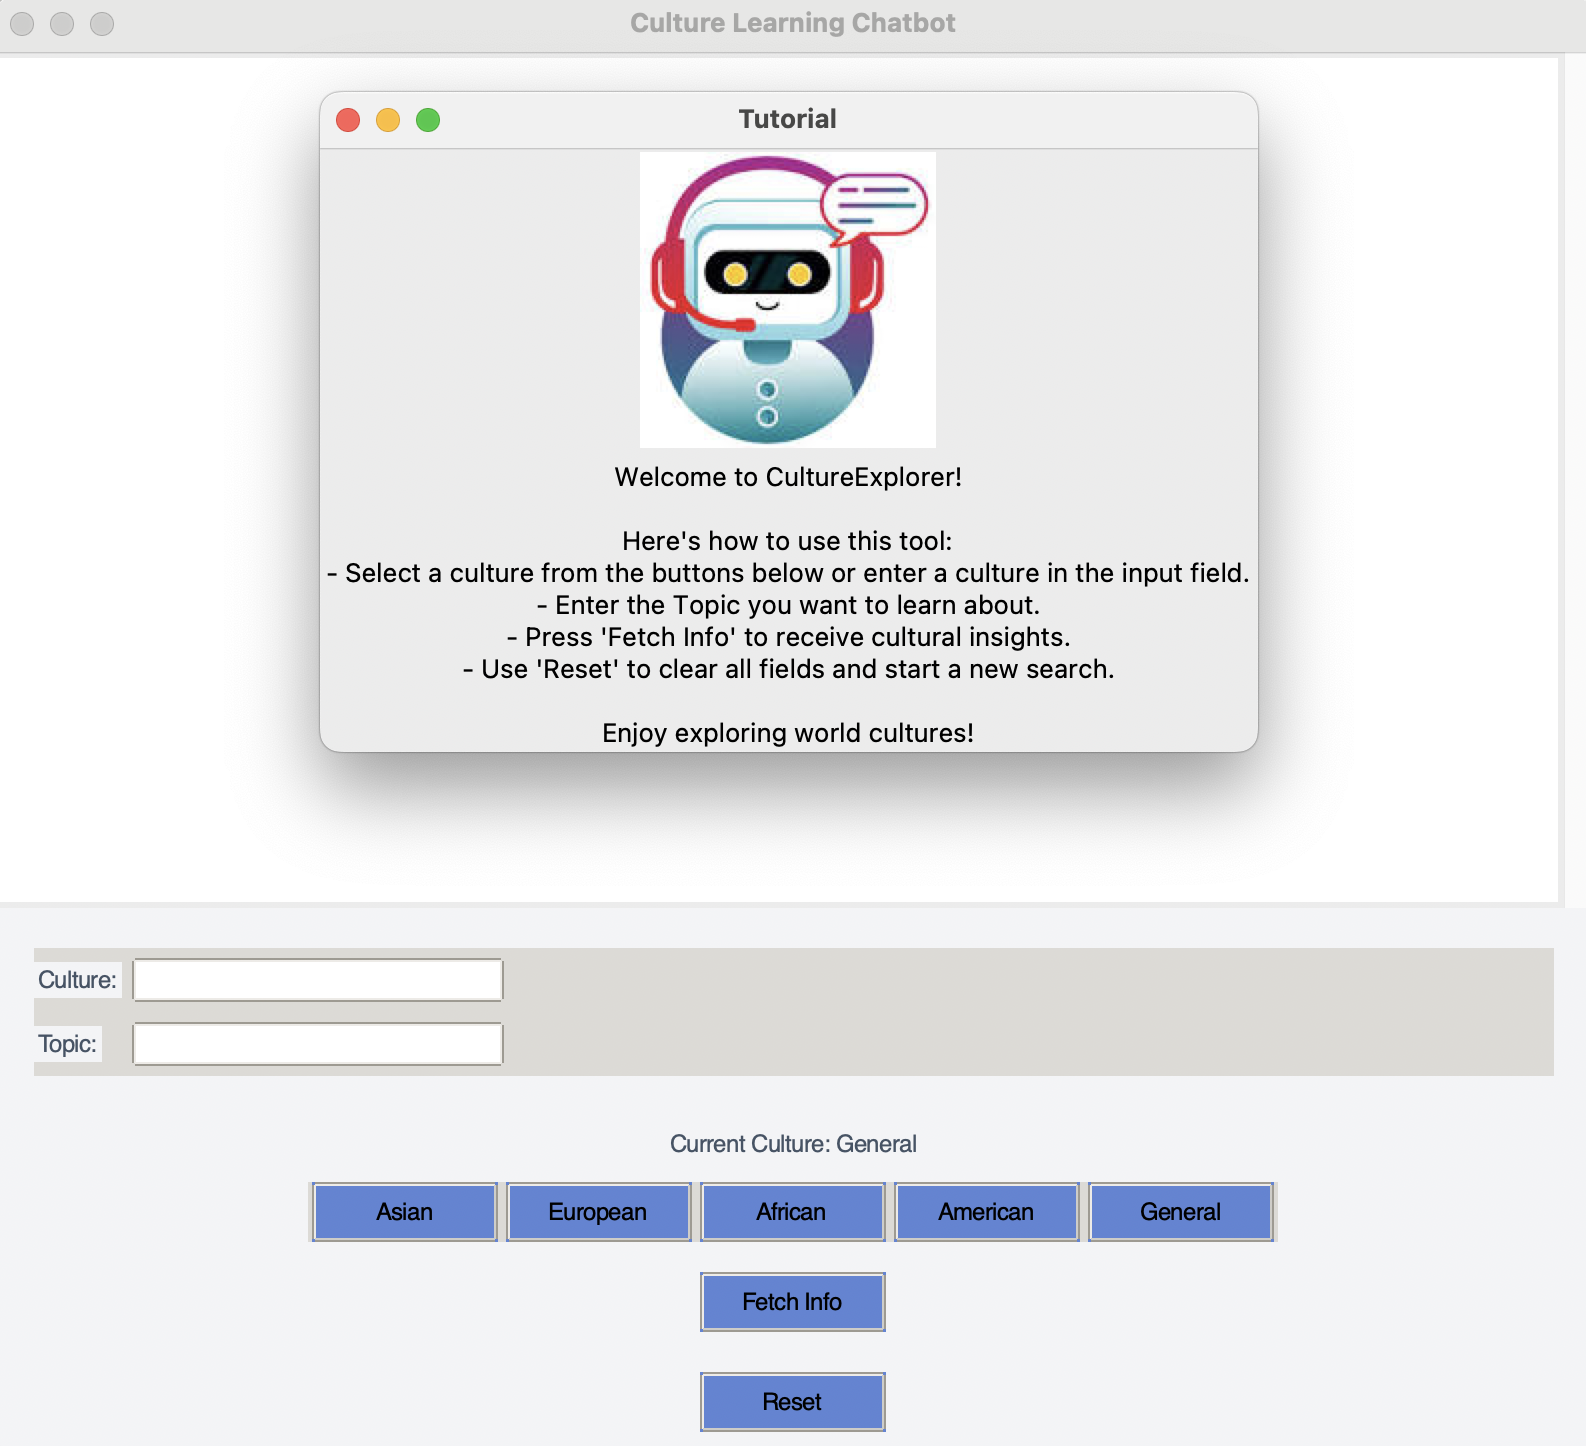

#### <span style="color:red"> Note: Rather than employing external User Interface services, I have utilized the standard Python interface to explore Python libraries and to understand both the advantages and limitations of using Python-based GUIs.</span>

In [1]:
import tkinter as tk
from tkinter import ttk, Toplevel, Label, PhotoImage, scrolledtext
import openai
from gtts import gTTS
import tempfile
import subprocess
import os

#### Data Generation Technique

#### OpenAI API:

#### Purpose: 
The OpenAI API is designed to generate text-based data using advanced machine learning models, primarily aimed at tasks like answering questions, summarizing content, translating languages, and more.

#### Models: 
It leverages a series of powerful models known as GPT (Generative Pre-trained Transformer), with the latest being GPT-4. These models have been trained on diverse datasets to understand and generate human-like text.

#### Capabilities:
Text Completion: Completing a given piece of text in a coherent and contextually relevant manner.

Text Generation: Creating text from scratch based on a prompt provided by the user.

Summarization: Condensing longer texts into concise summaries without losing the original context and intent.

Translation: Translating text from one language to another while maintaining accuracy and fluency.
Chat: Engaging in conversation with users in a natural, context-aware manner.
Usage:

#### API Calls: 
Users interact with the API through HTTP requests, sending data to the model and receiving generated text in return.

Customization: The API allows for various customizations such as controlling the length of the generated text, the style, and the degree of creativity or factual adherence.


In [2]:
# Setup OpenAI API key
openai.api_key = "sk-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

In [3]:
# Define your chatbot's behavior
botname = "CultureExplorer"
system_msg = "You are CultureExplorer, a chatbot that provides information about different cultures..."
current_culture = "General"  # Default culture

#### Main Window Configuration
Application Window Initialized:

Created with tk.Tk(), titled "PlotCraft", and sized appropriately at "800x" to ensure sufficient space for all UI components.

#### Style and Theme
Themed Widgets Configured with ttk:

Applied the 'clam' theme to align with modern OS aesthetics and configured ttk styles for buttons and labels to enhance visual consistency and appeal.

#### Layout and Widgets
Structured Layout Using Grid Management:

Employed the grid system for precise placement of widgets, enhancing the layout's clarity and functional organization.
Added essential widgets such as Entry for user inputs, Button for interactions like generating and resetting stories, and scrolledtext for displaying the generated stories.

#### Interactive Elements
Functional Widgets and Features:

Implemented input fields for user inputs (character names, settings), buttons to trigger story generation and application functionalities, and a scrollable text area for story output.
Integrated OpenAI API calls within the application to generate stories based on user-defined parameters.

#### Event Handling and Operations
Event Bindings Established:

Connected button actions to corresponding functions that handle story generation and application resets, ensuring a responsive and interactive user experience.
Added error handling to manage and respond to API interaction issues or input errors effectively.

#### Audio Feedback Implementation
Text-to-Speech Enabled:

Configured gtts to convert text outputs into spoken words, offering an auditory version of the generated stories, which enhances accessibility and user engagement.

#### Testing and Validation
Comprehensive Testing Conducted:

Thoroughly tested the GUI for functionality, usability, and appearance across different platforms to ensure robust performance and user satisfaction.

#### Deployment Ready

Application Packaged for Distribution:
Prepared the application for deployment, ensuring all features are stable and the GUI meets the intended design specifications.

In [4]:
# Setup the main window
window = tk.Tk()
window.title("Culture Learning Chatbot")
window.geometry("800x700")
window.config(bg='#f3f4f6')

In [5]:
# Configure style
style = ttk.Style()
style.theme_use('clam')
style.configure('TButton', font=('Helvetica', 12), background='#5c85d6')
style.configure('TLabel', font=('Helvetica', 12), background='#f3f4f6', foreground='#445466')
style.configure('TEntry', font=('Helvetica', 12), fieldbackground='#ffffff')

In [6]:
def speak(text):
    with tempfile.NamedTemporaryFile(delete=True, suffix='.mp3') as fp:
        tts = gTTS(text=text, lang='en')
        tts.save(fp.name)
        subprocess.run(['afplay', fp.name], check=True)
        fetch_button.config(state='normal')  # Re-enable the button after speech


In [7]:
def fetch_cultural_info():
    fetch_button.config(state='disabled')  # Disable the button to prevent multiple clicks
    culture = culture_input.get().capitalize()
    topic = topic_input.get().capitalize()
    prompt = f"Tell me about {culture} culture related to {topic}."
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "system", "content": system_msg},
                      {"role": "user", "content": prompt}]
        )
        info = response['choices'][0]['message']['content']
        info_display.delete('1.0', tk.END)
        info_display.insert(tk.END, info)
        print(info)  # Output in console
        window.after(100, lambda: speak(info))  # Delay speaking to ensure UI updates
    except openai.error.OpenAIError as e:
        print(f"An error occurred: {e}")
    finally:
        fetch_button.config(state='normal')  # Re-enable the button after processing


In [8]:

# Function to reset inputs and information display
def reset_info():
    culture_input.delete(0, tk.END)
    topic_input.delete(0, tk.END)
    info_display.delete('1.0', tk.END)

In [9]:
# Culture selection function
def update_culture(selected_culture):
    global current_culture
    current_culture = selected_culture
    culture_label.config(text=f"Current Culture: {selected_culture}")
    culture_input.delete(0, tk.END)
    culture_input.insert(0, selected_culture)

In [10]:
# Custom tutorial window with an image
def show_tutorial():
    tutorial_window = Toplevel(window)
    tutorial_window.title("Tutorial")
    try:
        tutorial_image = PhotoImage(file="Chatbot.png")
        tutorial_label = Label(tutorial_window, image=tutorial_image)
        tutorial_label.pack(side="top", fill="both", expand="yes")
        tutorial_label.image = tutorial_image  # Keep a reference!
    except Exception as e:
        print(f"Failed to load the image: {e}")
        # Optionally provide a fallback or error message
    Label(tutorial_window, text="Welcome to CultureExplorer!\n\n"
                                "Here's how to use this tool:\n"
                                "- Select a culture from the buttons below or enter a culture in the input field.\n"
                                "- Enter the Topic you want to learn about.\n"
                                "- Press 'Fetch Info' to receive cultural insights.\n"
                                "- Use 'Reset' to clear all fields and start a new search.\n\n"
                                "Enjoy exploring world cultures!").pack(side="bottom")

In [11]:
# Information output area using ScrolledText
info_display = scrolledtext.ScrolledText(window, height=10, width=50, wrap=tk.WORD, font=("Arial", 12), padx=10, pady=10)
info_display.pack(fill="both", expand=True)

In [12]:
# Define the layout using grid for input fields
input_frame = ttk.Frame(window)
input_frame.pack(fill='x', padx=20, pady=20)

In [13]:
# Input fields for culture and topic
ttk.Label(input_frame, text="Culture:").grid(row=0, column=0, sticky=tk.W)
culture_input = ttk.Entry(input_frame)
culture_input.grid(row=0, column=1, sticky=(tk.E + tk.W), padx=5, pady=5)

In [14]:
# Input fields for culture and topic
ttk.Label(input_frame, text="Culture:").grid(row=0, column=0, sticky=tk.W)
culture_input = ttk.Entry(input_frame)
culture_input.grid(row=0, column=1, sticky=(tk.E + tk.W), padx=5, pady=5)

ttk.Label(input_frame, text="Topic:").grid(row=1, column=0, sticky=tk.W)
topic_input = ttk.Entry(input_frame)
topic_input.grid(row=1, column=1, sticky=(tk.E + tk.W), padx=5, pady=5)

In [15]:
# Culture selection UI
culture_label = ttk.Label(window, text=f"Current Culture: {current_culture}")
culture_label.pack(pady=5)
culture_frame = ttk.Frame(window)
culture_frame.pack(padx=5, pady=5)
cultures = ["Asian", "European", "African", "American", "General"]
for c in cultures:
    btn = ttk.Button(culture_frame, text=c, command=lambda c=c: update_culture(c))
    btn.pack(side="left", padx=2)

In [16]:
# Buttons for fetching and resetting information
fetch_button = ttk.Button(window, text="Fetch Info", command=fetch_cultural_info)
fetch_button.pack(pady=10)

reset_button = ttk.Button(window, text="Reset", command=reset_info)
reset_button.pack(pady=10)


In [ ]:
# Show tutorial on startup
show_tutorial()

# Start the GUI loop
window.mainloop()

### Analyzing the Generated Data

#### 1.Comparing the Different Cultural Aspects of Various Countries

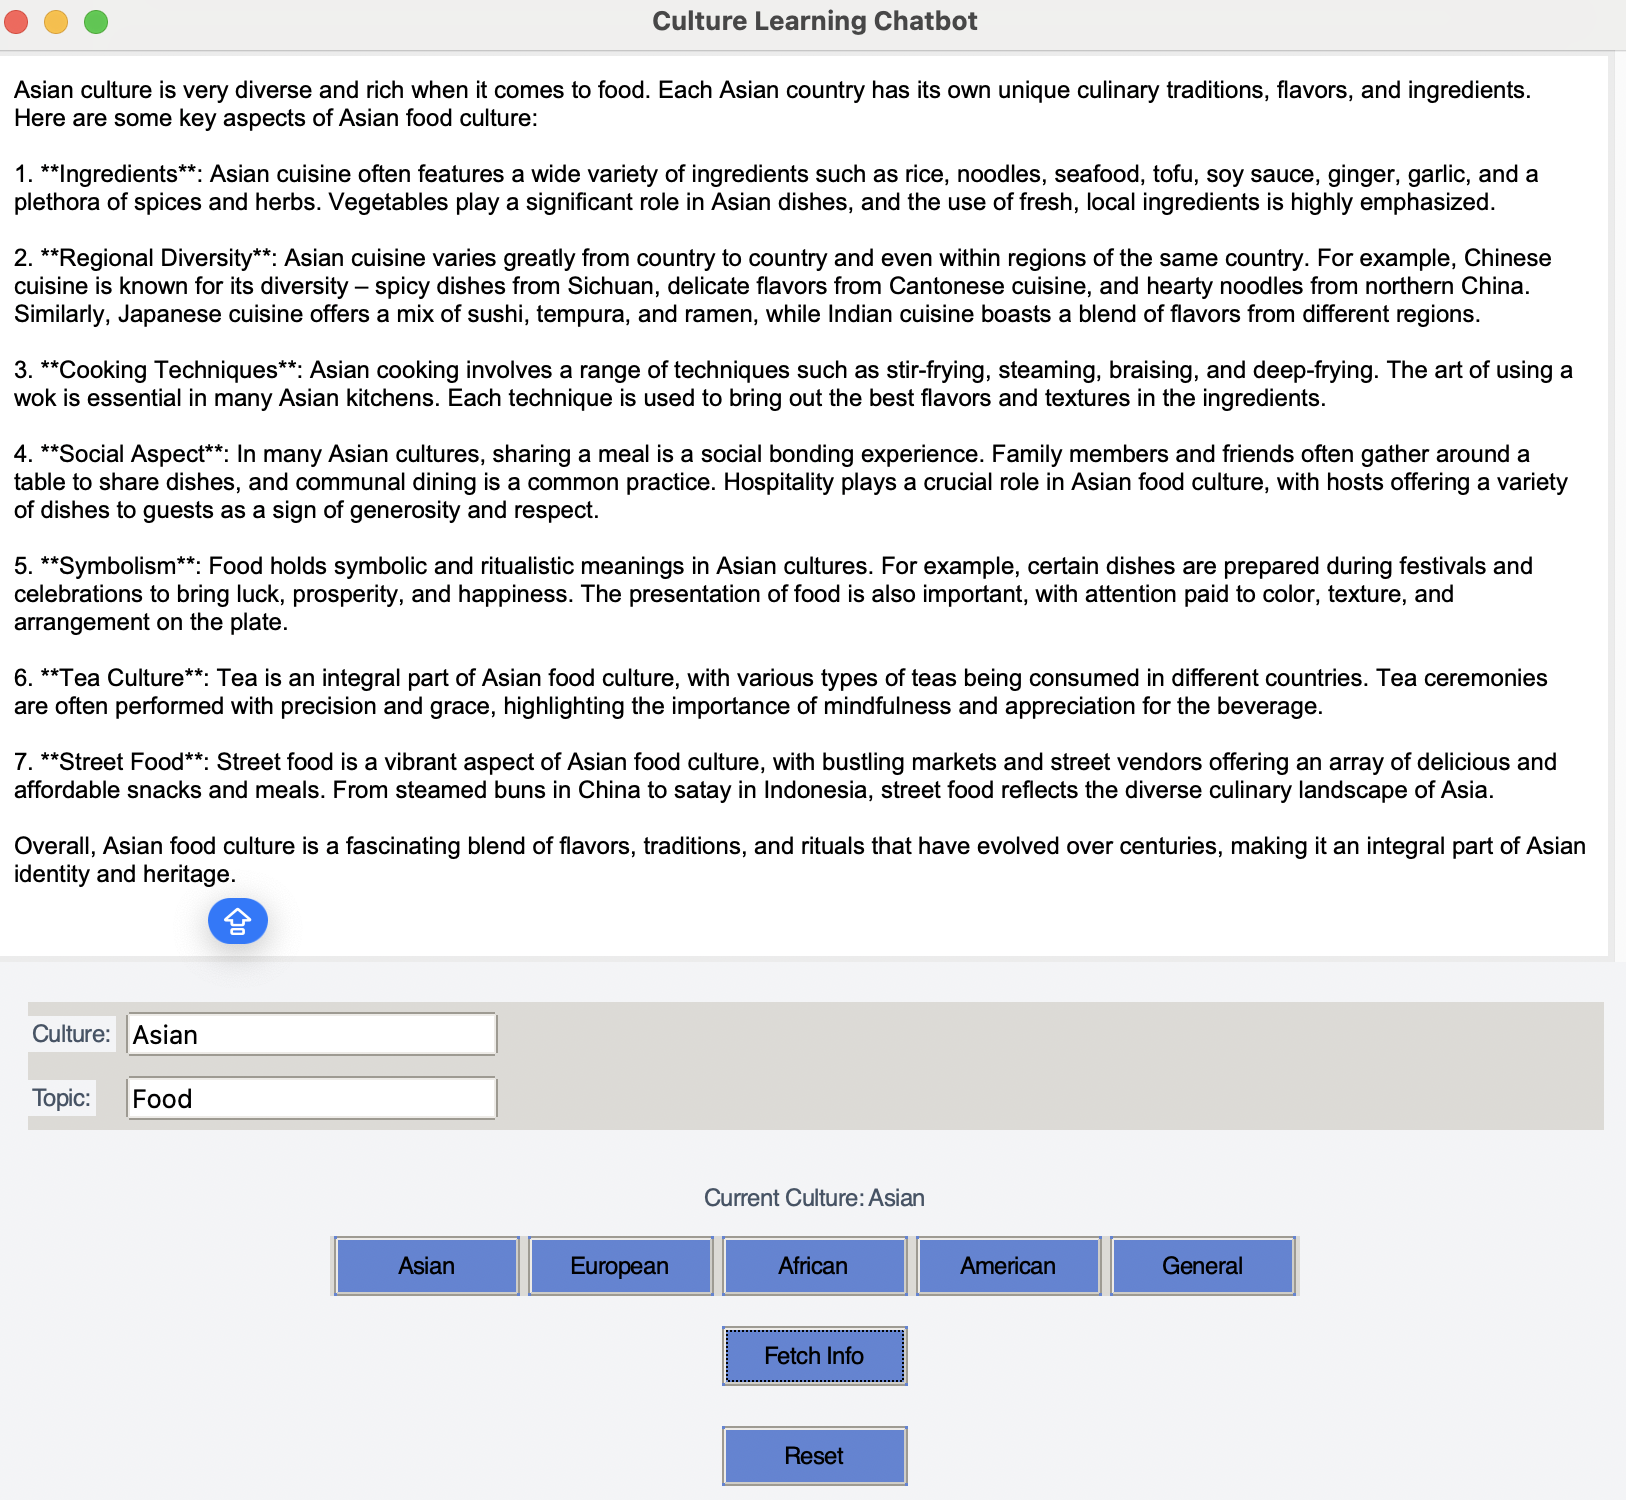

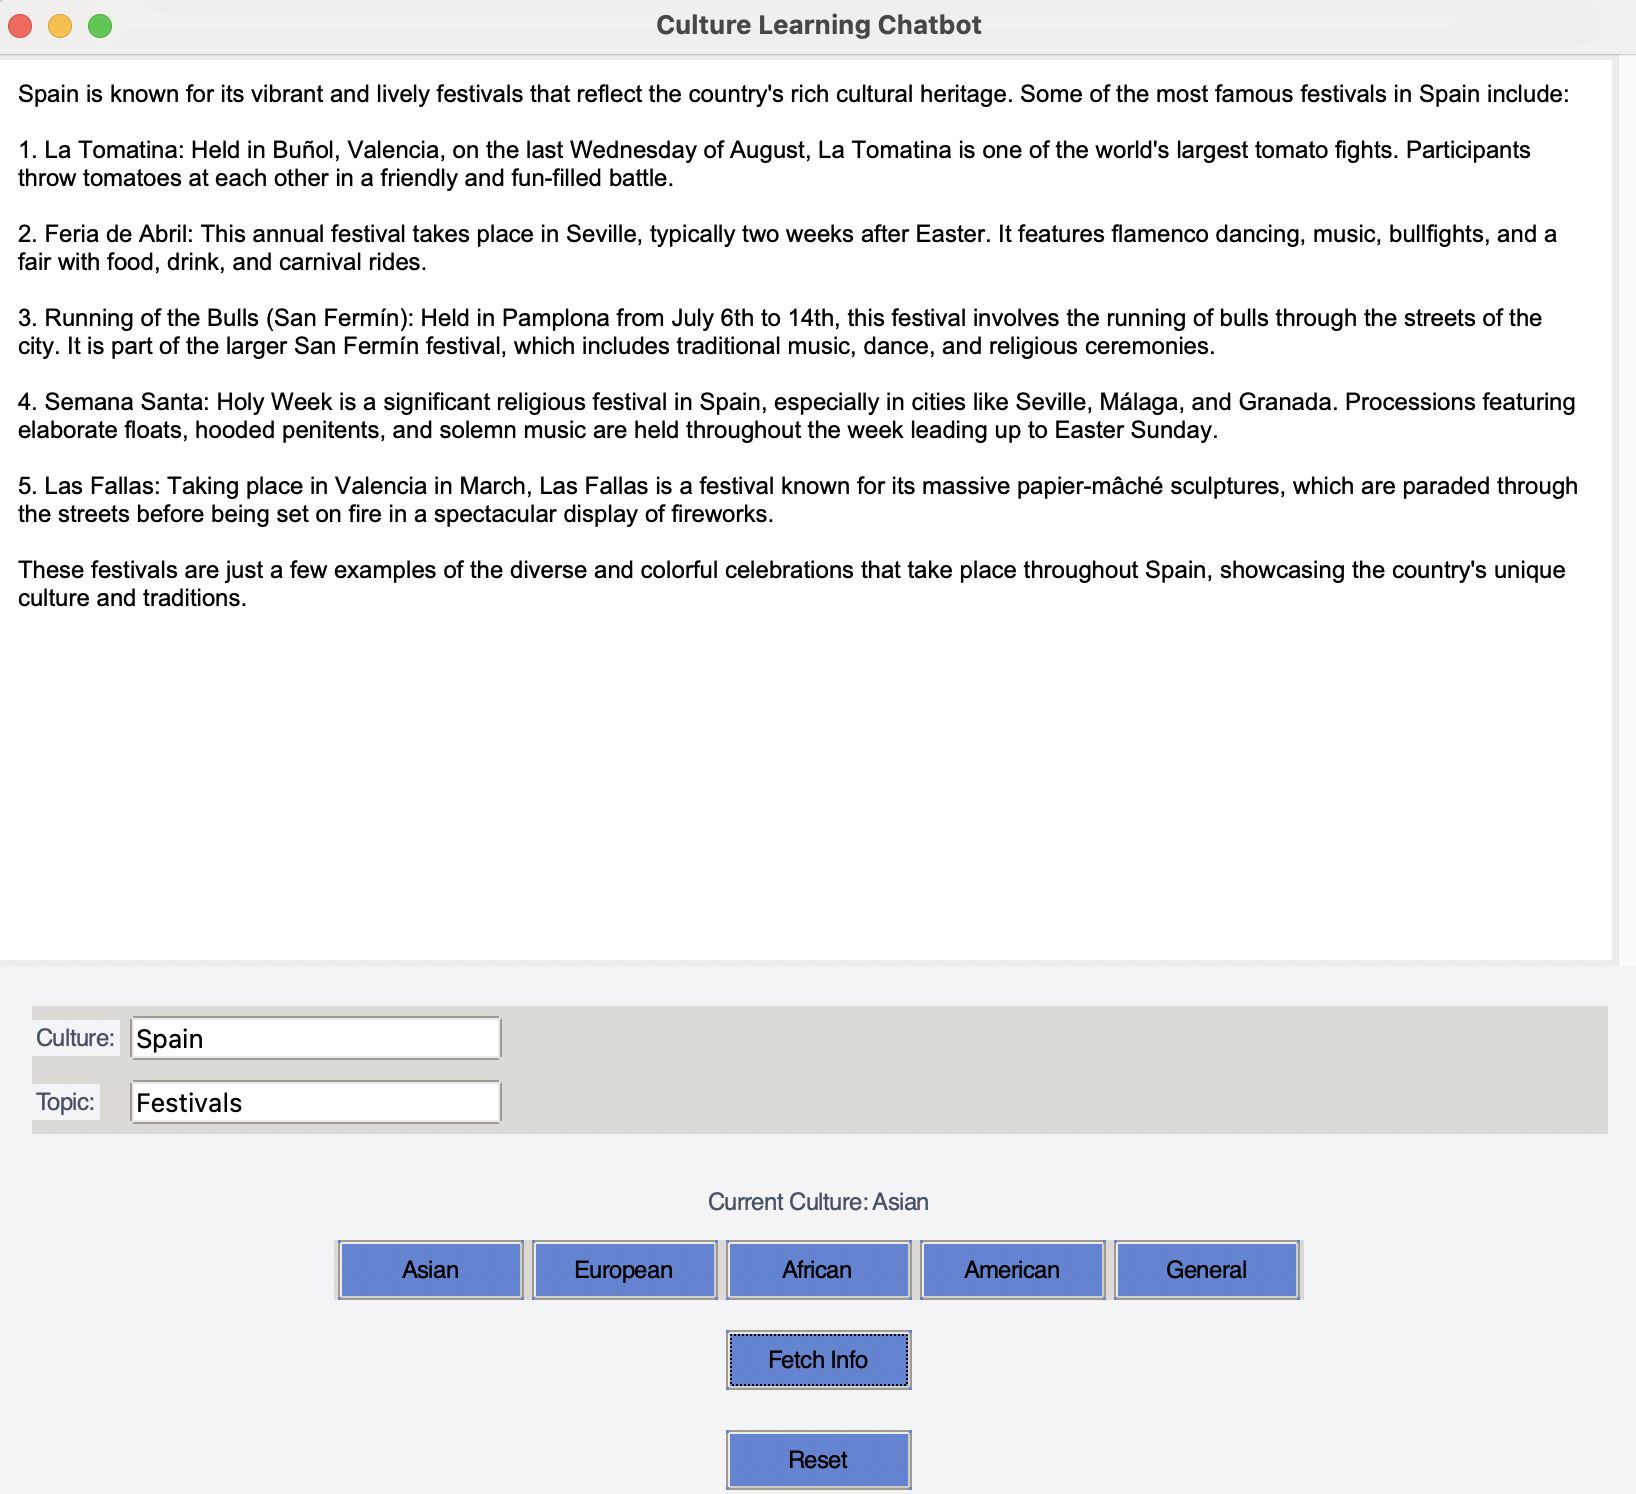

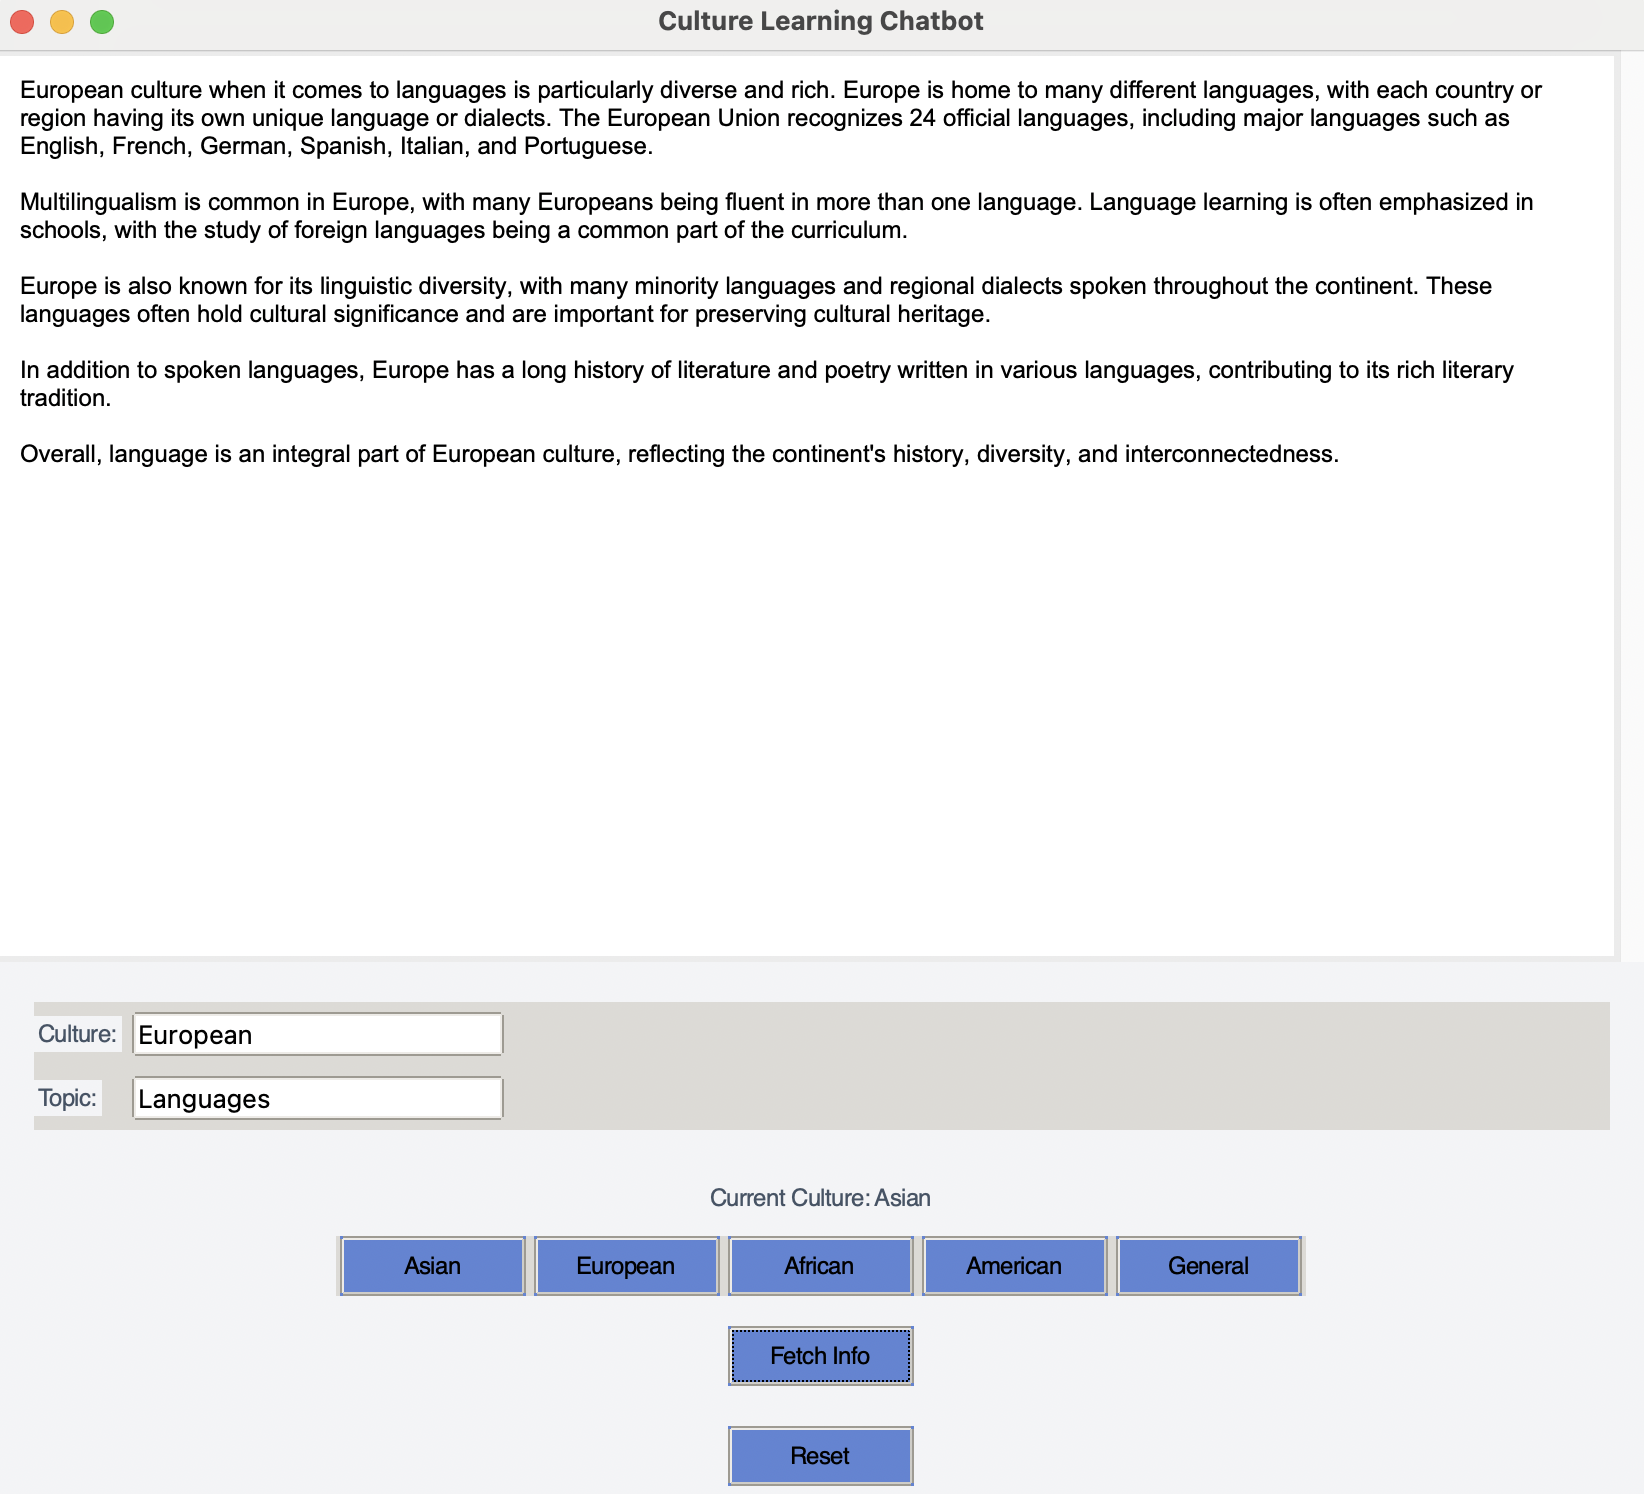

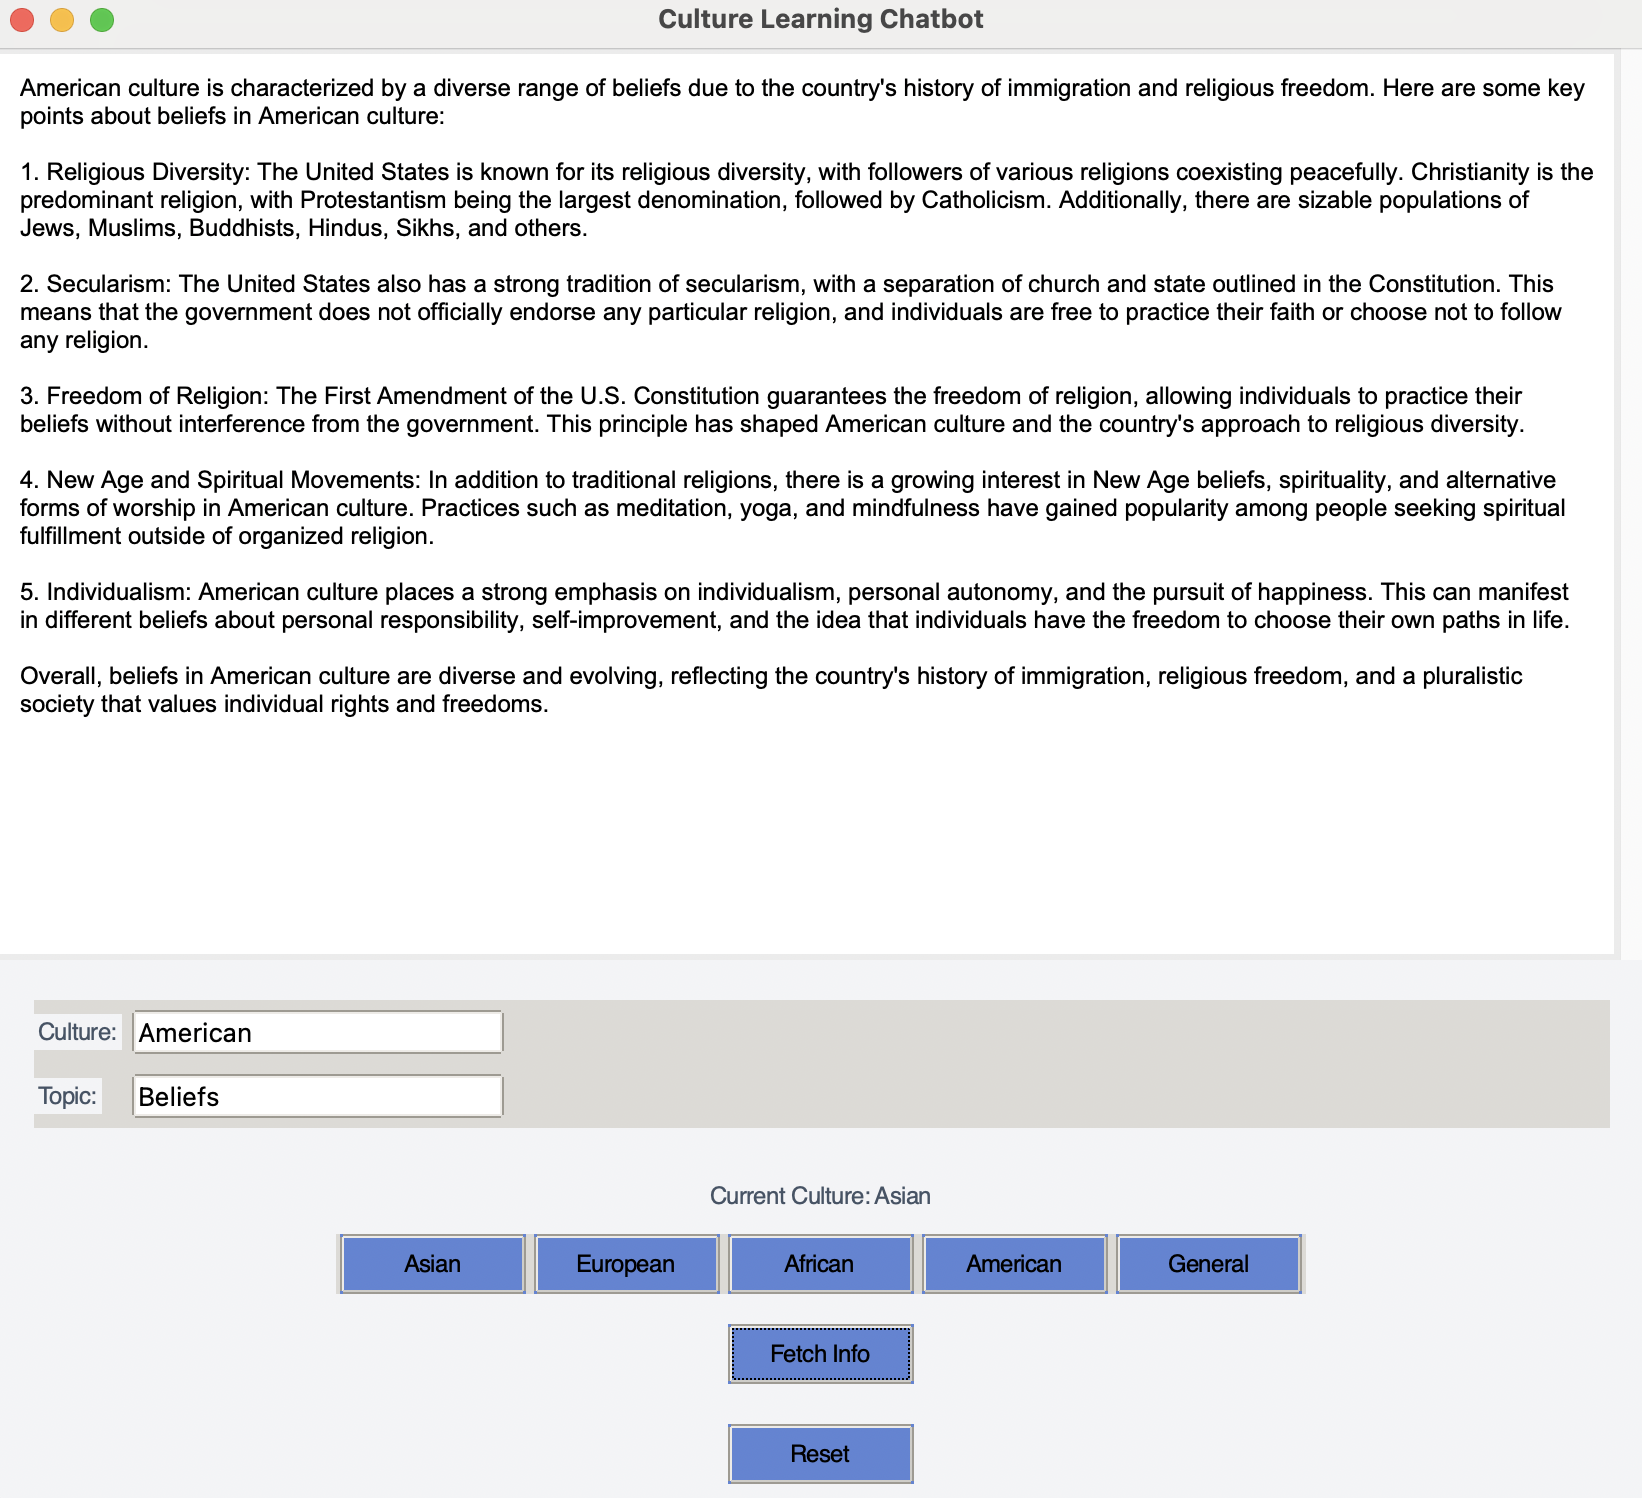

#### Data Characteristics
Comprehensive Coverage: 

The AI generates detailed and informative content on diverse cultural topics such as food, festivals, languages, and beliefs.

Cultural Specificity: 

Each generated entry is tailored to the cultural context it pertains to, showcasing a deep-dive into particular aspects unique to each culture.

Educational Format: 

The data is presented in an educational format, with numbered points and concise explanations ideal for learning.

Authenticity and Respect: 

The content appears to be written with a sense of respect and authenticity, providing insights without cultural appropriation.

#### Application Areas
Educational Platforms: 

The generated data can be utilized in online learning modules or educational apps focusing on cultural studies.

Travel and Tourism: 

This data can enhance travel guides or apps by providing travelers with insights into the local culture of their destinations.

Content Creation: 

Media and content creators can use this data to produce accurate cultural documentaries, articles, or books.

Social Integration Programs: 

The data can aid in social and cultural integration efforts, helping immigrants and expatriates understand and respect the culture of their new homes.

#### Analytical Insights
Cultural Trends and Values: 

By analyzing the generated content, one can understand the core values and trends prevalent in different cultures.

Comparative Cultural Analysis: 

The AI’s output allows for a comparison between cultures, which can foster a greater understanding and appreciation of global diversity.

Language and Lexicon Usage: 

The language used in the content can provide insights into how different cultures articulate and value their heritage.

Educational Content Gaps: 

Reviewing the generated data might highlight areas where cultural understanding is lacking, indicating where further educational efforts could be directed.


#### Summary:
This evaluation suggests that "CulturalExplorer" is capable of generating insightful and contextually rich data that can be leveraged across various domains to promote cultural awareness and education.

### Evaluation of Generated Data
Rich Cultural Context: 

The data includes specific cultural references that provide a rich context for understanding each culture.

Educational Utility: 

Structured as informative snippets suitable for educational purposes.

Diversity and Inclusion: 

Showcases a range of cultures, promoting diversity and inclusion.

Accuracy and Detail: 

Appears to give accurate details about each cultural aspect, indicating a robust data source or algorithm.

### Justification of Generated Data
Enhanced Learning Experience: 

Data depth enriches the learning curve for users interested in cultural studies.

Content Validity: 

The structured presentation of cultural facts suggests careful curation or generation, ideal for reliable informational content.

User Engagement: 

The bullet-point format is user-friendly, likely to engage users effectively.
Cross-Cultural Insights: The generated content can foster cross-cultural understanding and empathy among users.

### CONCLUSION:
In conclusion, the "CulturalExplorer" project successfully demonstrates the profound impact of generative AI on cultural education and awareness. By synthesizing vast amounts of cultural knowledge into concise, accessible insights, the platform offers an invaluable resource for learners, travelers, and curious minds worldwide. This innovative application of AI technology not only streamlines the acquisition of cultural understanding but also promotes a spirit of inclusivity and respect for global diversity. As "CulturalExplorer" continues to evolve, it stands as a testament to the potential of AI in bridging cultural divides and enriching our collective appreciation of the world's rich tapestry of traditions and customs.

### Improvements That Can Be Made:
By addressing the delay between user interaction and TTS feedback, "CulturalExplorer" can offer an improved educational tool that's both more efficient and pleasant to use. These enhancements would be particularly beneficial for users who rely on TTS due to accessibility requirements, ensuring the application is inclusive and user-friendly for all.

### References

1. https://towardsdatascience.com/
2. https://www.chatbot.com/help/stories/learn-about-stories/
3. https://topai.tools/s/storytelling-chatbot
4. https://www.researchgate.net/publication/230814247_The_implementation_of_a_storytelling_chatbot

### LICENSE

Copyright (c) 2023 Samarjeet Chavan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Google Drive Link (Video)

https://drive.google.com/file/d/1YFKkUCvoIK7EByaObLilgj4bEOZ89nyj/view?usp=sharing